In [1]:
# check that in priority

# kpeak en fonction de z
# distance de taille angulaire (check icosmos) (pour un objet de taille PHYSIQUE (pas comoving) fixe) en fonction de z
# s'obtient en mettant tout a 0 (en particulier omegam=0)
# angle (radians) for psuedoBAO 150 cMpc structure en fonction de z
# angle (raidans) for EVOLVING (with kpeak) pseudoBAO scale vs z
# l for evolving BAO scale vs z => at z=10 on doit aavoir l=600
# Mass of BAO structure vs z
# Grav potential at border of structure at BAO scale (GM/c^2r) vs z, should peak at z=20
# efficacite ISW vs z (delta phi sur le temps de traversee de la structure)
# amplitude ISW as (deltaT/T) produit de grav pot * efficacite (facteur 2)
# should peak at z~10 with 2e-5. should be 4 e-5 with the factor 2
# last plot ISW deltaT/T as a function of l

# (also, there is a github for https://github.com/cspotz/RAMSES_Bi-Poisson)
# also read some https://www.aanda.org/articles/aa/full_html/2011/01/aa16012-10/aa16012-10.html if I have the time
    

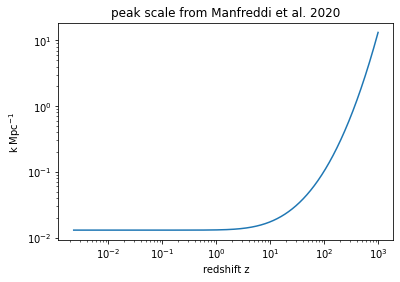

LambdaCDM(H0=70 km / (Mpc s), Om0=0, Ode0=0, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)


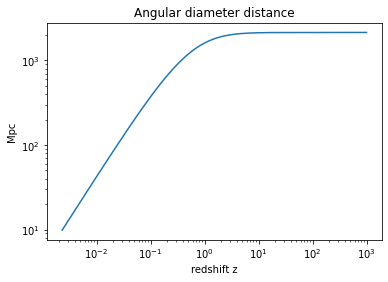

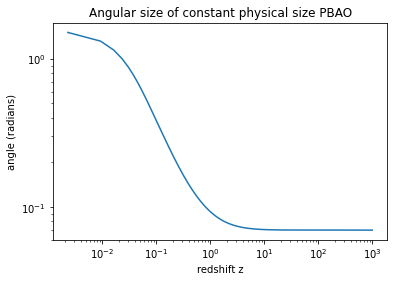

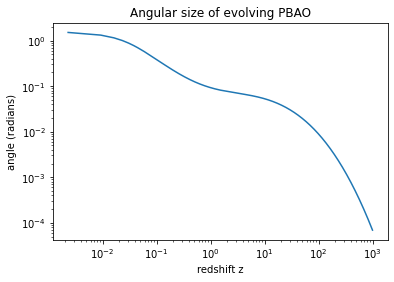

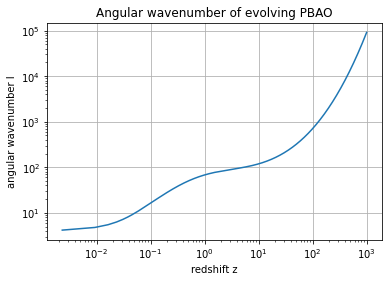

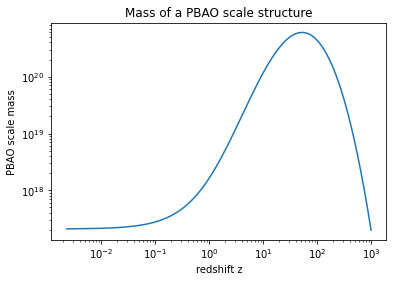

In [64]:
# Unit of k_peak in 1/Mpc
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

Mpcm=3.085e22 # Mpc in m


a=np.logspace(-3.,-0.001,1000)
z=1./a-1.
#pseudo-bao scale
pbaoscale=150.*u.Mpc # Mpc

def k_peak_gc(a):
    alphakpn=0.021
    # gabriel's value for alphakpn = 0.021
    return 0.013*np.exp(-alphakpn * np.log(a)**3)

plt.plot(z,k_peak_gc(a))
plt.xscale('log')
plt.yscale('log')
plt.ylabel('k Mpc$^{-1}$')
plt.xlabel('redshift z')
plt.title('peak scale from Manfreddi et al. 2020')
plt.show()

# distance de taille angulaire en Dirac-Milne
from astropy.cosmology import LambdaCDM
#FlatLambdaCDM.angular_diameter_distance(a)
cosmo = LambdaCDM(H0=70.,Om0=0.,Ode0=0.)
print(cosmo)
angdiamdist=cosmo.angular_diameter_distance(z)
plt.plot(z,angdiamdist)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mpc')
plt.xlabel('redshift z')
plt.title('Angular diameter distance')
plt.show()

# angle for a pbao constant physical size structure at z
plt.plot(z,np.arctan(pbaoscale/angdiamdist))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angle (radians)')
plt.title('Angular size of constant physical size PBAO')
plt.show()

# angle for a pbao structure whose physical size is shrinking with kpeak at z
plt.plot(z,np.arctan((pbaoscale*k_peak_gc(1)/k_peak_gc(a))/angdiamdist))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angle (radians)')
plt.title('Angular size of evolving PBAO')
plt.show()

# angular wavenumber of evolving PBAO
plt.plot(z,2.*np.pi/(np.arctan((pbaoscale*k_peak_gc(1)/k_peak_gc(a))/angdiamdist)))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angular wavenumber l')
plt.title('Angular wavenumber of evolving PBAO')
plt.grid()
plt.show()

# mass enclosed in PBAO structure vs z
# assuming density rhoavg=3H/m^3
ProtonMass=1.67e-27 # kg
rhoavg=0.6*ProtonMass # per m^3 comoving
# PBAO structure radius, physical:
radiusmeters=(pbaoscale*k_peak_gc(1)/k_peak_gc(a)).to(u.m) # in m
#PBAOmass=(4*np.pi/3)
PBAOmass=(4*np.pi/3)*(rhoavg/a**3)*radiusmeters**3 # in kg

plt.plot(z,PBAOmass/2.e30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('PBAO scale mass')
plt.title('Mass of a PBAO scale structure')
plt.show()




In [48]:
angdiamdist==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

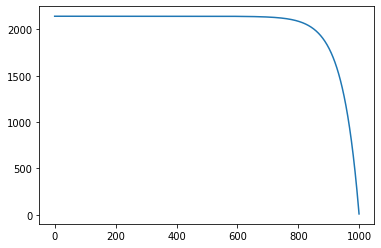

In [49]:
plt.plot(angdiamdist)